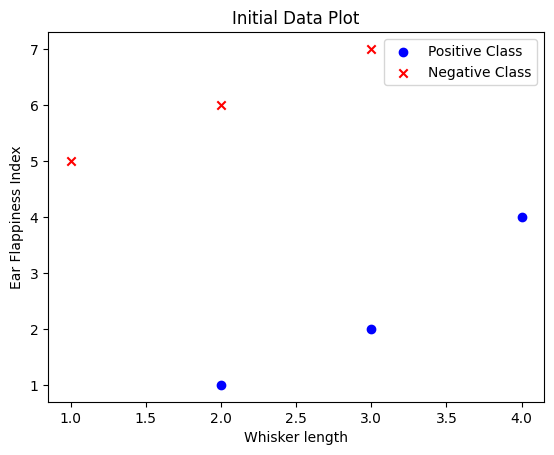

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### define the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))


### Loss function: loss likelihood
def compute_loss(y,hx):
    return -np.mean(y*np.log(hx) + (1-y)*np.log(1-hx))
                    

### Gardient of the loss
def compute_gradient(X,y,hx):
    return np.dot(X.T, (hx-y))/y.shape[0]


### dataset
X=np.array([[2,1],[3,2],[4,4],[1,5],[2,6],[3,7]])
y=np.array([1,1,1,0,0,0])


### Plot initial data
plt.scatter(X[:3,0],X[:3,1],color='blue',marker='o',label='Positive Class')
plt.scatter(X[3:,0],X[3:,1],color='red',marker='x',label='Negative Class')
plt.xlabel('Whisker length')
plt.ylabel('Ear Flappiness Index')
plt.legend()
plt.title('Initial Data Plot')
plt.show()

In [11]:
### Logistic Regression Model
def logistic_regression(X,y,learning_rate=0.01,num_iterations=100):
    ### Add intercept term to X (Add 1 to data)
    X=np.hstack((np.ones((X.shape[0],1)),X))

    ### Initialize weights (Initial value of theta=0)
    weights=np.zeros(X.shape[1])

    ## Gradient Descent
    for i in range(num_iterations):
        z=np.dot(X,weights)
        hx=sigmoid(z)
        loss=compute_loss(y,hx)
        gradient=compute_gradient(X,y,hx)
        weights -= learning_rate*gradient
        
        if i%10==0:
            plot_decision_boundary(X,y,weights,loss,i)
            print(f'Iteration{i}:Theta={weights},Loss={loss}')
    return weights



#### Plotting function for decision boundary
def plot_decision_boundary(X,y,weights,loss,iteration):
    plt.scatter(X[:3,1], X[:3,2],color='blue',marker='o',label='Positive Class' if iteration==0 else "")
    plt.scatter(X[3:,1], X[3:,2],color='red',marker='x',label='Negative Class' if iteration==0 else "")


    x_values=np.array([np.min(X[:,1])-1,np.max(X[:,1])+1])
    y_values=-(weights[0]+weights[1]*x_values)/weights[2]
    plt.plot(x_values,y_values,"k")


    plt.xlim(x_values[0],x_values[1])
    plt.ylim(np.min(X[:,2])-1,np.max(X[:,2])+1)
    plt.xlabel('Whisker length')
    plt.ylabel('Ear Flappiness Index')

    plt.title( f'Decision Boundary at Iterations {iteration}\nLoss:{loss}')
    if iteration==0:
        plt.legend()
    plt.show()


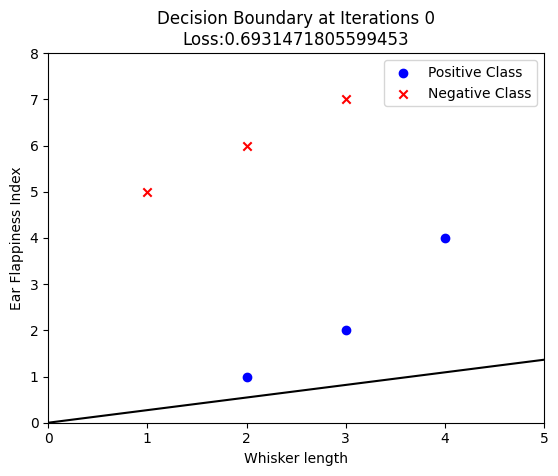

Iteration0:Theta=[ 0.          0.0025     -0.00916667],Loss=0.6931471805599453


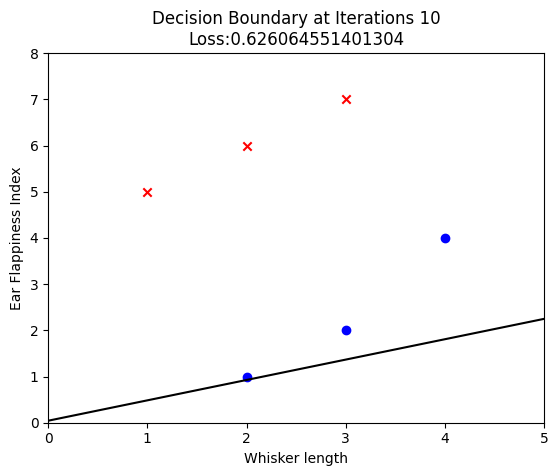

Iteration10:Theta=[ 0.00351898  0.03583314 -0.08124515],Loss=0.626064551401304


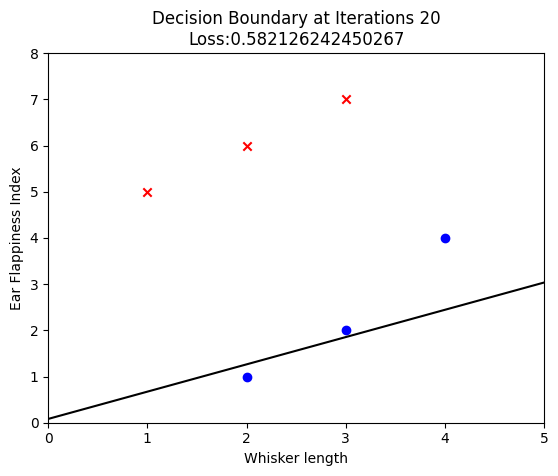

Iteration20:Theta=[ 0.0107534   0.07750049 -0.13121449],Loss=0.582126242450267


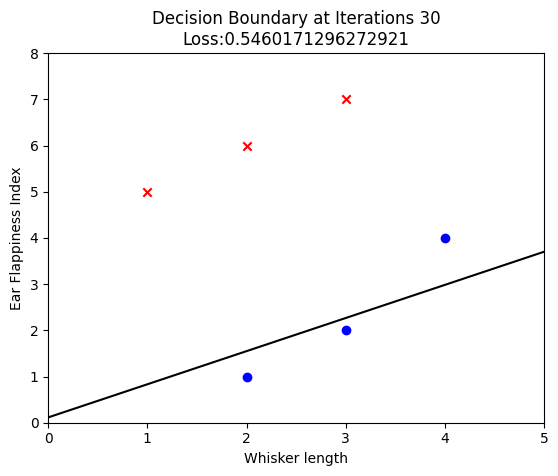

Iteration30:Theta=[ 0.01952555  0.12200009 -0.17007813],Loss=0.5460171296272921


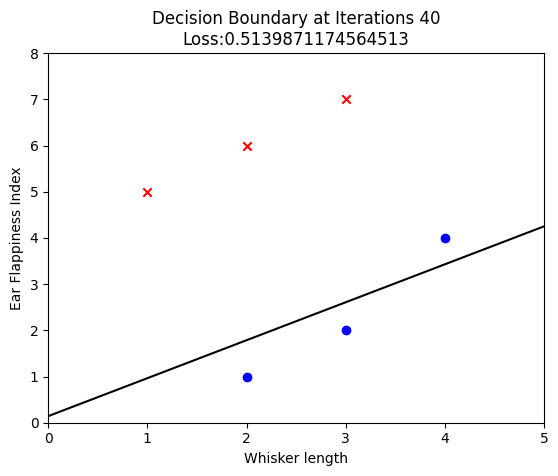

Iteration40:Theta=[ 0.02882972  0.16681759 -0.20296236],Loss=0.5139871174564513


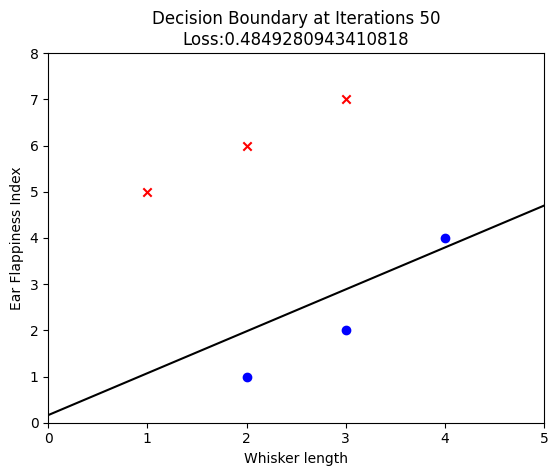

Iteration50:Theta=[ 0.03819345  0.21079708 -0.23234289],Loss=0.4849280943410818


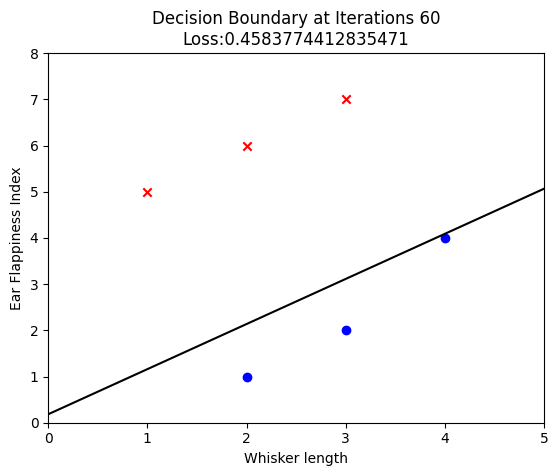

Iteration60:Theta=[ 0.04739475  0.25342232 -0.25946218],Loss=0.4583774412835471


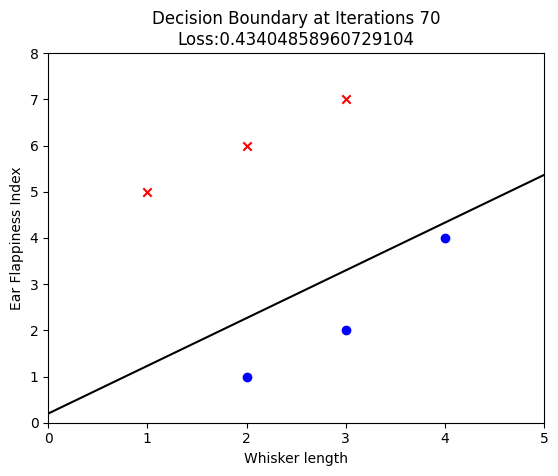

Iteration70:Theta=[ 0.05633317  0.29448797 -0.28496725],Loss=0.43404858960729104


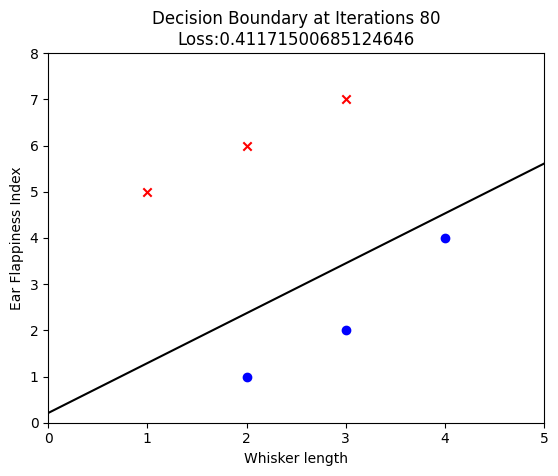

Iteration80:Theta=[ 0.0649683   0.33394185 -0.30920989],Loss=0.41171500685124646


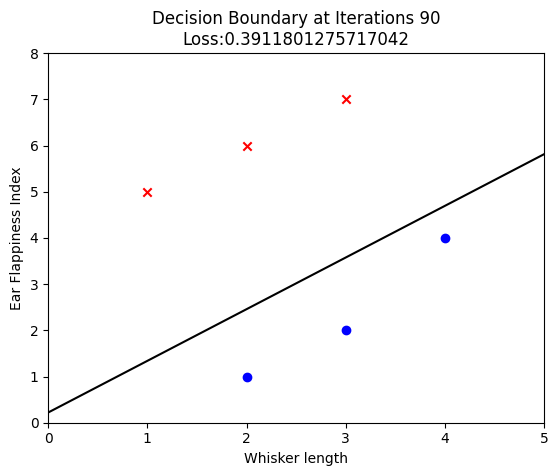

Iteration90:Theta=[ 0.07328952  0.37180678 -0.33239254],Loss=0.3911801275717042


In [12]:
### Training the model
weights=logistic_regression(X,y)